In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import pywt
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
random.seed(1)
dataset = sio.loadmat('dataset.mat')
heart_rate = dataset['heart_rate']
signal = dataset['signal']

In [3]:
def statistics(signal):
    avg = np.mean(signal)
    sd = np.std(signal)
    maxm = max(signal)
    minm = min(signal)
    return avg, sd, maxm, minm

In [4]:
# extract feature
def extractfeature(signal, heart_rate):
    a = len(heart_rate)
    b = np.linspace(0, a-1, a, dtype=int)
    random.shuffle(b)
    b.astype('int')
    features = np.zeros((a, 48))
    heart = np.zeros((a, 1))
    for j in range(0, a):
        i = b[j]
        signal11 = signal[i, 0: 1000]
        signal12 = (signal11[1:-1] + signal11[2:])/ 2. - (signal11[1:-1] + signal11[:-2])/ 2.
        signal13 = signal11[2:] - 2*signal11[1:-1] + signal11[:-2]
        _, signal16, signal15, signal14 = pywt.wavedec(signal11, 'Haar', level=3)
        signal21 = signal[i, 1000: 2000]
        signal22 = (signal21[1:-1] + signal21[2:])/ 2. - (signal21[1:-1] + signal21[:-2])/ 2.
        signal23 = signal21[2:] - 2*signal21[1:-1] + signal21[:-2]
        _, signal26, signal25, signal24 = pywt.wavedec(signal21, 'Haar', level=3)
        features[j, 0:4] = statistics(signal11)
        features[j, 4:8] = statistics(signal12)
        features[j, 8:12] = statistics(signal13)
        features[j, 12:16] = statistics(signal14)
        features[j, 16:20] = statistics(signal15)
        features[j, 20:24] = statistics(signal16)
        features[j, 24:28] = statistics(signal21)
        features[j, 28:32] = statistics(signal22)
        features[j, 32:36] = statistics(signal23)
        features[j, 36:40] = statistics(signal24)
        features[j, 40:44] = statistics(signal25)
        features[j, 44:48] = statistics(signal26)
        heart[j] = heart_rate[i]
    return features, heart

In [5]:
X, Y  = extractfeature(signal, heart_rate)
X_train, Y_train = X[:2400, :], Y[:2400, 0]
X_test, Y_test = X[2400:, :], Y[2400:, 0]

In [14]:
regressor = RandomForestRegressor(n_estimators = 450, oob_score=True)
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)

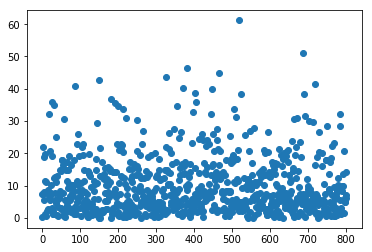

The avarage predict error:  9.87827369218
The mean squared error: 175.096321621


In [16]:
X = np.linspace(0, 802, 803)
Y_error = abs(Y_pred - Y_test)
plt.scatter(X, Y_error)
plt.show()
print('The avarage predict error: ', np.mean(Y_error))
print ('The mean squared error:', metrics.mean_squared_error(Y_test, Y_pred))

In [17]:
for a in range(50, 550, 50):
    regressor = RandomForestRegressor(n_estimators = a, oob_score=True)
    regressor.fit(X_train, Y_train)
    Y_error = abs(Y_pred - Y_test)
    Y_pred = regressor.predict(X_test)
    print('n_estimators: ', a)
    print('The avarage predict error: ', np.mean(Y_error))
    print('The mean squared error:', metrics.mean_squared_error(Y_test, Y_pred))

n_estimators:  50
The avarage predict error:  9.87827369218
The mean squared error: 173.373941499
n_estimators:  100
The avarage predict error:  9.89421285478
The mean squared error: 175.691162831
n_estimators:  150
The avarage predict error:  9.85200191566
The mean squared error: 175.951133927
n_estimators:  200
The avarage predict error:  9.82616141012
The mean squared error: 175.154340453
n_estimators:  250
The avarage predict error:  9.81639950648
The mean squared error: 171.907924649
n_estimators:  300
The avarage predict error:  9.7604241407
The mean squared error: 175.344322469
n_estimators:  350
The avarage predict error:  9.88367695702
The mean squared error: 173.171567895
n_estimators:  400
The avarage predict error:  9.77165798805
The mean squared error: 173.546190824
n_estimators:  450
The avarage predict error:  9.82903120633
The mean squared error: 173.088197689
n_estimators:  500
The avarage predict error:  9.77541616689
The mean squared error: 173.037942549
